# Load DB from MySQL

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Insert Database connection details
user = 'root'
password = 'mYsT4nd4rdQu3rYL4ngu4g3'
host = 'localhost'
database = 'nba_database'

# Create connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

In [2]:
# Define the table name
table_name = 'betting_and_game_table'

# Query the database and load data into a DataFrame
df = pd.read_sql(f'SELECT * FROM {table_name};', con=engine)

# Display the first few rows of the DataFrame
display(df)

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,HomeML_Prob,AwayML_Prob,2H_Spread_Diff,2H_Over_Diff,Offensive_Efficiency_HOME,Defensive_Efficiency_HOME,Offensive_Efficiency_AWAY,Defensive_Efficiency_AWAY,Pace_Home,Pace_Away
0,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,0.346783,0.882338,-0.5,-96.5,1.942308,1.807692,2.473684,2.657895,159.0,159.0
1,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,0.373301,0.869850,0.0,-103.5,1.875000,1.714286,2.400000,2.625000,176.0,176.0
2,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,0.869850,0.373301,0.5,-92.5,2.195122,2.463415,1.905660,1.698113,165.0,165.0
3,20700106,22007,1610612766,CHA,Charlotte Hornets,2007-11-14,CHA @ ATL,L,240,41.0,...,0.876229,0.359935,7.0,-94.5,3.078947,2.868421,3.758621,4.034483,160.0,160.0
4,20700123,22007,1610612760,OKC,Oklahoma City Thunder,2007-11-16,SEA @ ATL,W,290,47.0,...,0.896477,0.314940,0.5,-104.0,2.617021,2.680851,2.930233,2.860465,198.0,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17108,22100241,22021,1610612748,MIA,Miami Heat,2021-11-20,MIA @ WAS,L,240,38.0,...,0.478427,0.794582,-0.5,-107.0,2.942857,2.857143,2.702703,2.783784,155.0,155.0
17109,22100254,22021,1610612766,CHA,Charlotte Hornets,2021-11-22,CHA @ WAS,W,240,40.0,...,0.833662,0.414501,-0.5,-112.5,1.584615,1.676923,3.027778,2.861111,185.0,185.0
17110,22100321,22021,1610612750,MIN,Minnesota Timberwolves,2021-12-01,MIN @ WAS,L,240,37.0,...,0.825526,0.428537,1.0,-112.0,2.211538,2.057692,2.743590,2.948718,179.0,179.0
17111,22100334,22021,1610612739,CLE,Cleveland Cavaliers,2021-12-03,CLE @ WAS,W,240,42.0,...,0.808318,0.456934,-4.0,-107.0,3.060606,3.515152,2.148148,1.870370,171.0,171.0


# Model Training

## Logistic Regression

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Selecting features based on your EDA findings
features = [
    'HomeWinStreak', 'AwayWinStreak', 'EFG_AWAY', 'EFG_HOME', 'FG_PCT_HOME', 
    'FG_PCT_AWAY', 'HomeSpread_AtClose', 'AwayML_Prob', 'HomeML_Prob', 
    'FG3_PCT_HOME', 'FG3_PCT_AWAY', 'AST_HOME', 'AST_AWAY', 
    'AST_TOV_RATIO_AWAY', 'AST_TOV_RATIO_HOME', 'Home_PTS_RollAvg', 'Away_PTS_RollAvg'
]

# Define your target variables
X = df[features]
y = df['HomeWin']  # 1 if home team won, 0 if away team won

In [5]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9330996202161846
Confusion Matrix:
[[1309  117]
 [ 112 1885]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1426
           1       0.94      0.94      0.94      1997

    accuracy                           0.93      3423
   macro avg       0.93      0.93      0.93      3423
weighted avg       0.93      0.93      0.93      3423



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

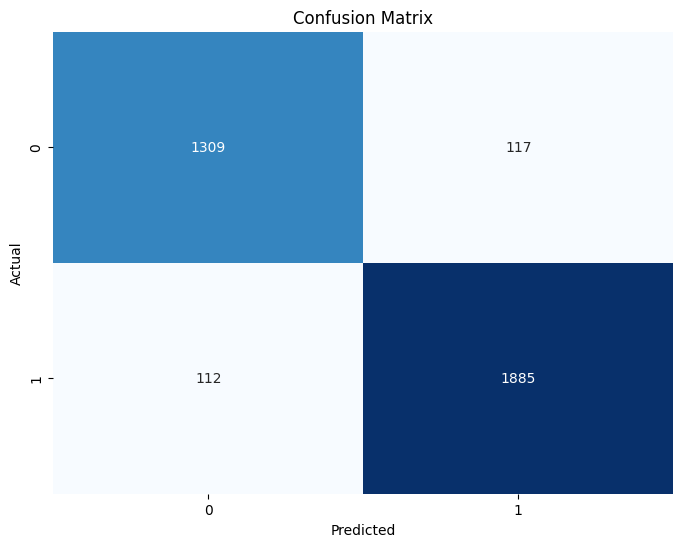

In [9]:
# Plot confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import numpy as np
import pandas as pd

# Define features and target variable
features = [
    'HomeWinStreak', 'AwayWinStreak', 'EFG_AWAY', 'EFG_HOME', 'FG_PCT_HOME', 
    'FG_PCT_AWAY', 'HomeSpread_AtClose', 'AwayML_Prob', 'HomeML_Prob', 
    'FG3_PCT_HOME', 'FG3_PCT_AWAY', 'AST_HOME', 'AST_AWAY', 
    'AST_TOV_RATIO_AWAY', 'AST_TOV_RATIO_HOME', 'Home_PTS_RollAvg', 'Away_PTS_RollAvg'
]

x = df[features]
y = df['HomeWin']

# Encode target variable from categorical to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check class distribution in the encoded target variable
print("Class distribution in the target variable:")
print(pd.Series(y_encoded).value_counts())

# Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize the model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

# Print best parameters from GridSearchCV
print("Best Parameters:")
print(grid_search.best_params_)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Feature Selection with SelectFromModel
selector = SelectFromModel(best_model, threshold='mean', prefit=True)
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

# Retrain the model with selected features
best_model.fit(x_train_selected, y_train)

# Make predictions with the model
y_pred = best_model.predict(x_test_selected)

# Convert predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Print some predictions vs true values for inspection
print("Sample Predictions vs True Values:")
print(pd.DataFrame({'True': y_test_labels, 'Predicted': y_pred_labels}).head(10))

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
class_report = classification_report(y_test_labels, y_pred_labels)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Class distribution in the target variable:
1    10016
0     7097
Name: count, dtype: int64
Fitting 5 folds for each of 27 candidates, totalling 135 fits


D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:16:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:16:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:16:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8

Best Parameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Sample Predictions vs True Values:
   True  Predicted
0     0          0
1     0          0
2     0          0
3     1          1
4     1          1
5     0          0
6     0          0
7     1          1
8     1          0
9     0          0
Accuracy: 0.8665
Confusion Matrix:
[[1150  270]
 [ 187 1816]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1420
           1       0.87      0.91      0.89      2003

    accuracy                           0.87      3423
   macro avg       0.87      0.86      0.86      3423
weighted avg       0.87      0.87      0.87      3423



D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Projects\Github Repo\Predictive-Analytics-for-a-Betting-Gaming-Platform\laminavenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:17:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


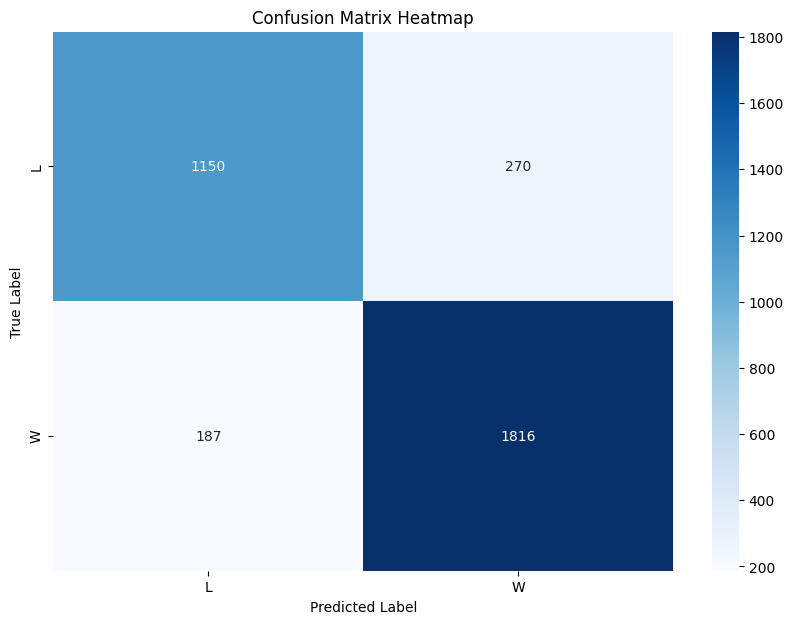

In [11]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()